# Titanic - Machine Learning from Disaster

Baby steps on Kaggle Machine Learning Competitions.

In [1]:
path = ''

## 1. Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## 2. Loading the Dataset

### 2.1 Reading in train.csv

In [3]:
raw_train_data = pd.read_csv(path + 'train.csv')
raw_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Simple data dictionary:

|  Column      | Description | Remarks |
| :---         | :--- | :--- |
| PassengerId  | ID of the passenger | |
| Survived     | Survived or not | 0 = No, 1 = Yes |
| Pclass       | Class of the ticket | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name         | Name of ticket holder | |
| Sex          | Gender of ticket holder | |
| Age          | Age of ticket holder | |
| Sibsp        | Number of siblings or spouses on board | |
| Parch        | Number of parents or children on board | |
| Ticket       | Ticket number | |
| Fare         | Passenger fare | |
| Cabin        | Cabin number | |
| Embarked     | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


In [4]:
raw_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 Reading in test.csv

Unlike train.csv, there is no `Survived` column. It will be predicted at the end of this notebook.

In [5]:
raw_test_data = pd.read_csv(path + 'test.csv')
raw_test_data.shape

(418, 11)

## 3. Data Cleaning


### 3.1 Cleaning train.csv
Focus on cleaning the data from train.csv first. Let's not touch the raw data but instead make a deep copy of it and clean it.

In [6]:
### get a copy of the raw data
train_data = raw_train_data.copy()
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 3.1.1 Identifying Missing Values 

First I check for any missing values present in the dataframe.


In [8]:
### count null values in each column
train_data.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Age`, `Cabin` and `Embarked` contains null values.

Since the percentage of missing value in `Embarked` and `Age` are considered small (~0.22% and ~19.87%), they will be filled it later. 

As for `Cabin`, it already has too many missing value (~77.1%), therefore it will be dropped. 

*Note: Most people consider 70% as the maximum threshold. 

#### 3.1.2 `Pclass`

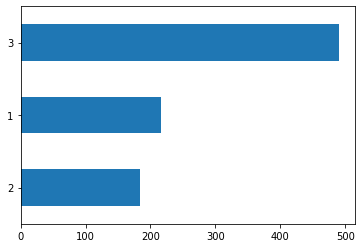

In [9]:
train_data['Pclass'].value_counts().sort_values().plot(kind='barh')

Most of the passengers are third class passengers. Following up with first class passengers being the second most, and lastly the second class passengers, being the least.


In [10]:
first_class = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_1 = sum(first_class)/len(first_class)
print("% of first class passenger who survived: ", rate_1)

second_class = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_2 = sum(second_class)/len(second_class)
print("% of second class passenger who survived:", rate_2)

third_class = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_3 = sum(third_class)/len(third_class)
print("% of third class passenger who survived: ", rate_3)

% of first class passenger who survived:  0.6296296296296297
% of second class passenger who survived: 0.47282608695652173
% of third class passenger who survived:  0.24236252545824846


Overall, first class passengers have a higher chance of surviving. Following up with second class passengers and lastly third class passengers.

#### 3.1.3 `Name`

Each passenger has a title in their name column. So extracting it out and binning them might be a good idea. Besides, we might be able to predict their age by using their title.

In [11]:
### extracting the title of the passenger
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [12]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Capt          1
Sir           1
Jonkheer      1
Lady          1
Countess      1
Don           1
Mme           1
Name: Title, dtype: int64

There are several types of title. I am going to bin them into 4 categories:
- Mr: 0
- Miss: 1
- Mrs: 2
- Others: 3

In [13]:
### mapping the titles
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Mlle": 3, "Col": 3, "Major": 3, "Countess": 3, "Jonkheer": 3,
                 "Ms": 1, "Sir": 3, "Capt": 3, "Don": 3, "Mme": 3, "Lady": 3}
train_data['Title'] = train_data['Title'].map(title_mapping)

In [14]:
train_data[['Title']].head()

,Title
0,0
1,2
2,1
3,2
4,0


#### 3.1.4 `Sex`

In [15]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


Women has a higher chance of surviving.

In [16]:
### transforms the categocial data into numerical representation
# Sex => female: 0, male: 1
train_data['Sex'] = pd.Categorical(train_data['Sex'])
train_data['Sex'] = train_data['Sex'].cat.codes

#### 3.1.5 `Age`

Now that we already have `Title`, we can use it to 'predict' the missing `Age`.

In [17]:
### filling in the missing data with median age of each title
train_data['Age'].fillna(train_data.groupby('Title')['Age'].transform('median'), inplace=True)

*Can I do binning on `Age`?*

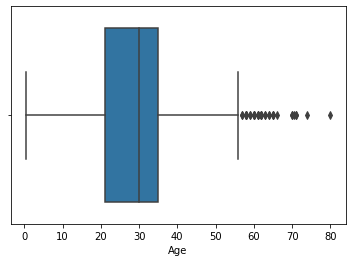

In [18]:
sns.boxplot(x='Age', data=train_data)

#### 3.1.6 `SibSp` and `Parch`

`SibSp`: number of siblings/spouse

`Parch`: number of parents/children

Both attributes are the number of family members, hence I try to sum them up together.

In [19]:
### summing the number of siblings/spouse and the number of parents/children
train_data['Family'] = train_data['SibSp'] + train_data['Parch']

In [20]:
train_data['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

#### 3.1.7 `Fare`


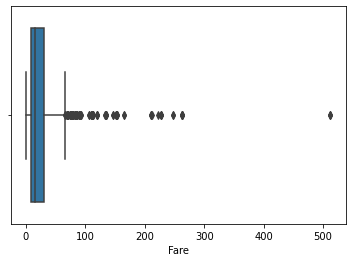

In [21]:
sns.boxplot(x='Fare', data=train_data)

`Fare` will need to be normalized.

#### 3.1.8 `Embarked`

In [22]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

'S' appears the most. The missing data can be filled in with 'S'.

In [23]:
### filling the missing value with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [24]:
### transforms the categocial data into numerical representation
# Embarked => C: 0, Q: 1, S:2
train_data['Embarked'] = pd.Categorical(train_data['Embarked'])
train_data['Embarked'] = train_data['Embarked'].cat.codes

#### 3.1.9 ? `Ticket` and `Cabin`

Not sure how to handle these 2 for the time being... 🤔

Will be dropping them later.

In [25]:
train_data['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
347088      6
3101295     6
           ..
345779      1
330909      1
2700        1
13214       1
113510      1
Name: Ticket, Length: 681, dtype: int64

In [26]:
train_data['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
F33            3
              ..
D49            1
C110           1
C70            1
C49            1
A36            1
Name: Cabin, Length: 147, dtype: int64

Seems like it is possible to get which section the `Cabin` is located on the ship (section A~E?), however do note that there are over 70% of missing data present in this column. Future extension includes getting predicting the missing value or getting possible information from this.

#### 3.1.10 Final stage of cleaning

'Age' and 'Fare' are normalized.

In [27]:
attributes = ['Age', 'Fare']

### normalizing the data 
scaler = MinMaxScaler()
train_data[attributes] = scaler.fit_transform(train_data[attributes])

In [28]:
### dropping a few columns
train_data = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,1,0.271174,1,0,0.014151,2,0,1
1,2,1,1,0,0.472229,1,0,0.139136,0,2,1
2,3,1,3,0,0.321438,0,0,0.015469,2,1,0
3,4,1,1,0,0.434531,1,0,0.103644,2,2,1
4,5,0,3,1,0.434531,0,0,0.015713,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0.334004,0,0,0.025374,2,3,0
887,888,1,1,0,0.233476,0,0,0.058556,2,1,0
888,889,0,3,0,0.258608,1,2,0.045771,2,1,3
889,890,1,1,1,0.321438,0,0,0.058556,0,0,0


In [29]:
### correlation
corr = train_data[['Survived', 'Title', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Family', 'Fare', 'Embarked']].corr()
corr

,Survived,Title,Pclass,Sex,Age,SibSp,Parch,Family,Fare,Embarked
Survived,1.000000,0.444230,-0.338481,-0.543351,-0.076083,-0.035322,0.081629,0.016639,0.257307,-0.167675
Title,0.444230,1.000000,-0.163855,-0.556469,-0.156228,0.289054,0.343822,0.369327,0.146122,-0.071313
Pclass,-0.338481,-0.163855,1.000000,0.131900,-0.348490,0.083081,0.018443,0.065997,-0.549500,0.162098
Sex,-0.543351,-0.556469,0.131900,1.000000,0.104150,-0.114631,-0.245489,-0.200988,-0.182333,0.108262
Age,-0.076083,-0.156228,-0.348490,0.104150,1.000000,-0.260233,-0.185141,-0.270353,0.097720,-0.013455
SibSp,-0.035322,0.289054,0.083081,-0.114631,-0.260233,1.000000,0.414838,0.890712,0.159651,0.068230
Parch,0.081629,0.343822,0.018443,-0.245489,-0.185141,0.414838,1.000000,0.783111,0.216225,0.039798
Family,0.016639,0.369327,0.065997,-0.200988,-0.270353,0.890712,0.783111,1.000000,0.217138,0.066516
Fare,0.257307,0.146122,-0.549500,-0.182333,0.097720,0.159651,0.216225,0.217138,1.000000,-0.224719
Embarked,-0.167675,-0.071313,0.162098,0.108262,-0.013455,0.068230,0.039798,0.066516,-0.224719,1.000000


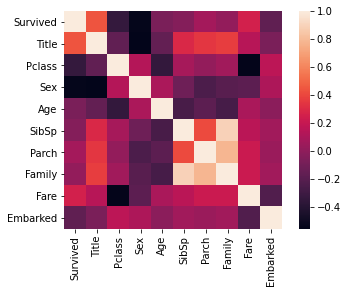

In [30]:
sns.heatmap(corr, square=True)

### 3.2 Cleaning test.csv

In [31]:
test_data = raw_test_data.copy()
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

`Age`, `Fare` and `Cabin` contains null values.

The percentage of missing value in `Fare` and `Age` are considered small (\~0.23% and \~20.57%), they are both filled in later. Similar to train.csv, `Cabin` has too many missing value (\~78.23%), hence it will be dropped.

The dataset is processed similarly to the train.csv from now on.

In [32]:
### extracting the title of the passenger
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [33]:
### mapping the titles
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Col": 3, "Rev": 3, "Ms": 1, "Dr": 3, "Dona": 3}
test_data['Title'] = test_data['Title'].map(title_mapping)

### transforms the categocial data into numerical representation
# Sex => female: 0, male: 1
test_data['Sex'] = pd.Categorical(test_data['Sex'])
test_data['Sex'] = test_data['Sex'].cat.codes

### filling in the missing data with median age of each title
test_data['Age'].fillna(test_data.groupby('Title')['Age'].transform('median'), inplace=True)

### summing the number of siblings/spouse and the number of parents/children
test_data['Family'] = test_data['SibSp'] + test_data['Parch']

### filling in the missing data with column mean
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

### transforms the categocial data into numerical representation
# Embarked => C: 0, Q: 1, S:2
test_data['Embarked'] = pd.Categorical(test_data['Embarked'])
test_data['Embarked'] = test_data['Embarked'].cat.codes

### normalizing the data 
scaler = MinMaxScaler()
test_data[attributes] = scaler.fit_transform(test_data[attributes])
test_data

### dropping a few columns
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_data


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,892,3,1,0.452723,0,0,0.015282,1,0,0
1,893,3,0,0.617566,1,0,0.013663,2,2,1
2,894,2,1,0.815377,0,0,0.018909,1,0,0
3,895,3,1,0.353818,0,0,0.016908,2,0,0
4,896,3,0,0.287881,1,1,0.023984,2,2,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0.373599,0,0,0.015713,2,0,0
414,1306,1,0,0.512066,0,0,0.212559,0,3,0
415,1307,3,1,0.505473,0,0,0.014151,2,0,0
416,1308,3,1,0.373599,0,0,0.015713,2,0,0


## 4. Building the Predictive Model



### 4.1 Testing on a few predictive models

Since the "correct" output of `Survived` is not given in test.csv, let's test a few models on the train data itself.

The output of `Survived` has two possibilities: 

- 0: No
- 1: Yes

Therefore, a classification model is suitable to classify whether the passenger survived or not. The train dataset is split into 2 parts, a train and a test to test out the accuracy of different models. The model with the highest accuracy will be chosen to predict the data from test.csv.

Here's a list of models that I will be testing on:

1. Random Forest Classifier
2. Decision Tree Classifier
3. K-Nearest Neighbors (kNN) Classifier
4. Multi-Layer Perceptron (MLP) Classifier.
5. Support Vector Classifier (SVC)
6. Logistic Regression
7. XGBoost Classifier

Let's have a look on the so-called cleaned data again.

In [34]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,1,0.271174,1,0,0.014151,2,0,1
1,2,1,1,0,0.472229,1,0,0.139136,0,2,1
2,3,1,3,0,0.321438,0,0,0.015469,2,1,0
3,4,1,1,0,0.434531,1,0,0.103644,2,2,1
4,5,0,3,1,0.434531,0,0,0.015713,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,0.334004,0,0,0.025374,2,3,0
887,888,1,1,0,0.233476,0,0,0.058556,2,1,0
888,889,0,3,0,0.258608,1,2,0.045771,2,1,3
889,890,1,1,1,0.321438,0,0,0.058556,0,0,0


I will be using cross-validation too to cross-validate each sample.


In [35]:
features = ['Pclass', 'Sex', 'Age', 'Family', 'Fare', 'Embarked', 'Title']
X = train_data[features].copy() 
y = train_data['Survived'].copy()  

### splitting test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### 4.1.1 Random Forest Classifier

In [36]:
model1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model1.fit(X_train, y_train)
predictionRFC = model1.predict(X_test)


In [37]:
cv_model1 = cross_validate(model1, X, y, cv=5, return_estimator=True, return_train_score=True, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


#### 4.1.2 Decision Tree Classifier


In [38]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
predictionDTC = model2.predict(X_test)


In [39]:
cv_model2 = cross_validate(model2, X, y, cv=5, return_estimator=True, return_train_score=True, verbose=2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### 4.1.3 K-Nearest Neighbors (KNN) Classifier

In [40]:
model3 = KNeighborsClassifier(n_neighbors=20)
model3.fit(X_train, y_train)
predictionKNN = model3.predict(X_test)


In [41]:
cv_model3 = cross_validate(model3, X, y, cv=5, return_estimator=True, return_train_score=True, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


#### 4.1.4 Multi-Layer Perceptron (MLP) Classifier


In [42]:
model4 = MLPClassifier(hidden_layer_sizes =(4,5,3), max_iter=1000, random_state=1)
model4.fit(X_train, y_train)
predictionMLP = model4.predict(X_test)


In [43]:
cv_model4 = cross_validate(model4, X, y, cv=5, return_estimator=True, return_train_score=True, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................................................. , total=   1.2s
[CV]  ................................................................
[CV] ................................................. , total=   1.1s
[CV]  ................................................................
[CV] ................................................. , total=   1.4s
[CV]  ................................................................
[CV] ................................................. , total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


#### 4.1.5 Support Vector Classifier (SVC)

In [44]:
model5 = SVC()
model5.fit(X_train, y_train)
predictionSVC = model5.predict(X_test)


In [45]:
cv_model5 = cross_validate(model5, X, y, cv=5, return_estimator=True, return_train_score=True, verbose=2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


#### 4.1.6 Logistic Regression

Logistic Regression is derived from regression models, but due to the nature of using a logistic function, it functions like a classifier, giving almost binary decisions (close to 0 or 1) to predictions. So, this makes it more a classifier than a regressor.

Since we are predicting whether the passenger survived or not (0 or 1), we may use linear regression in this case.

In [46]:
model6 = LogisticRegression()
model6.fit(X_train, y_train)
predictionLR = model6.predict(X_test)


In [47]:
cv_model6 = cross_validate(model6, X, y, cv=5, return_estimator=True, return_train_score=True, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


#### 4.1.7 XGBoost Classifier

XGBoost stands for e**X**treme **G**radient **B**oosting. It is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.

In [48]:
model7 = XGBClassifier()
model7.fit(X_train, y_train)
predictionXGB = model7.predict(X_test)


In [49]:
cv_model7 = cross_validate(model7, X, y, cv=5, return_estimator=True, return_train_score=True, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.

### 4.2 Evaluation

#### 4.2.1 Accuracy

In [50]:
### accuracy
print("The accuracy of:")
print("Random Forest Classifier \t\t", accuracy_score(y_test, predictionRFC))
print("Decision Tree Classifier \t\t", accuracy_score(y_test, predictionDTC))
print("K-Nearest Neighbors Classifier \t\t", accuracy_score(y_test, predictionKNN))
print("Multi-Layer Perceptron Classifier \t", accuracy_score(y_test, predictionMLP))
print("Support Vector Classifier\t\t", accuracy_score(y_test, predictionSVC))
print("Linear Regression \t\t\t", accuracy_score(y_test, predictionLR))
print("XGBoost \t\t\t\t", accuracy_score(y_test, predictionXGB))

The accuracy of:
Random Forest Classifier 		 0.7988826815642458
Decision Tree Classifier 		 0.7318435754189944
K-Nearest Neighbors Classifier 		 0.770949720670391
Multi-Layer Perceptron Classifier 	 0.8100558659217877
Support Vector Classifier		 0.7988826815642458
Linear Regression 			 0.7988826815642458
XGBoost 				 0.7877094972067039


Multi-Layer Perceptron Classifier performs the best in accuracy. However, this is only applied to `random_state=1` while splitting the train data.

#### 4.2.2 Test Score

To prevent bias while splitting the data, let's evaluate the test score of cross-validation of each predictive model.

In [51]:
### test score
print("The test score of:")
print("Random Forest Classifier \t\t", cv_model1['test_score'].mean())
print("Decision Tree Classifier \t\t", cv_model2['test_score'].mean())
print("K-Nearest Neighbors Classifier \t\t", cv_model3['test_score'].mean())
print("Multi-Layer Perceptron Classifier \t", cv_model4['test_score'].mean())
print("Support Vector Classifier \t\t", cv_model5['test_score'].mean())
print("Linear Regression \t\t\t", cv_model6['test_score'].mean())
print("XGBoost \t\t\t\t", cv_model7['test_score'].mean())

The test score of:
Random Forest Classifier 		 0.824913690289373
Decision Tree Classifier 		 0.7598141987320319
K-Nearest Neighbors Classifier 		 0.8260310087251271
Multi-Layer Perceptron Classifier 	 0.8237900947837549
Support Vector Classifier 		 0.8293829640323898
Linear Regression 			 0.8181846713953927
XGBoost 				 0.8440148138848785


XGBoost seems to perform the best.

### 4.3 Building the Model

In [52]:
model = MLPClassifier(hidden_layer_sizes =(4,5,3), max_iter=1000, random_state=1)
model.fit(X, y)

X_test_data = test_data[features]
predictions = model.predict(X_test_data)

Output the predictions to a csv file for evaluation on Kaggle.

In [53]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv(path + 'my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Afterword

After building the models, all the above models are used to predict the `Survived` column in test.csv. Here is a sorted list of score that I receive from Kaggle:

|  Algorithm      | Score |
| :---            | :---: |
| Random Forest Classifier          | 0.78468 | 
| Multi-Layer Perceptron Classifier | 0.78468 |
| Logistic Regression               | 0.78229 |
| Support Vector Classifier         | 0.77272 |
| K-Nearest Neighbors Classifier    | 0.76555 |
| XGBoost Classifier                | 0.76315 |
| Decision Tree Classifier          | 0.71770 |

The score is a categorization accuracy of predicting whether the passenger on Titanic survived or not, with the highest score being 1 and the lowest being 0. In conclusion, the Random Forest Classifier and Multi-Layer Percpetron Classifer perform the best among other classification algorithm in this case.

Future extend of this work includes fine-tuning the predictive model in terms of data cleaning and feature selection.


## Reference

1. Rençberoğlu, E. (2019, April 1)  [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)
2. Brownlee, J. (2021, Febuary 17). [A Gentle Introduction to XGBoost for Applied Machine Learning](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

